### Flight Price Prediction

#### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records
FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

##### Importing necessary libraries

In [80]:

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore


#train test split and #cross validation
from sklearn.model_selection import train_test_split as TTS, GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import datasets 
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

#ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


import joblib

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [7]:
df = pd.read_excel('Data_Train.xlsx')
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [8]:
df.tail(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10663,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35 07 Jun,17h 5m,2 stops,In-flight meal not included,11733
10664,IndiGo,9/04/2019,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,non-stop,No info,4823
10665,IndiGo,27/04/2019,Kolkata,Banglore,CCU → BLR,15:15,17:45,2h 30m,non-stop,No info,4804
10666,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262
10667,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087
10668,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7h 20m,2 stops,No info,21219
10669,Air India,15/06/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,9929
10670,Air India,12/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10671,Air India,6/06/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [9]:
df.shape

(10683, 11)

## EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- `there are a very few null cells in the dataset`
- `all features are object data types`
- `target - price of the flight ticket is int64`

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

## Feature Extraction (pre-processing)

In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [14]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [15]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [16]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [17]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_Day                 int64
Journey_Month               int64
dtype: object

- `columns containing date and time information has been converted to datetime64 data type, as it was object before.`
- `converting date of journey into day and month, considering all dates pertain to the year 2019.`
- `now we can drop Date_of_Journey column, since we have already separated date and month from it.`

In [18]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [19]:
df['Duration']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df['Duration']=pd.to_numeric(df['Duration'])

In [20]:
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).dt.minute

- `duration of flight has been transformed into hours and minutes, and converted to numeric data for the purpose of model building`
- `hours and minutes have been extracted from Dep_Time and stored in relevant columns accordingly`
- `now we can drop Dep_Time, since we have alreayd stored the relevant info.`

In [21]:
df.drop("Dep_Time",axis=1,inplace=True)

In [22]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)

- `similarly, Arrival_Time has been transformed into hours and minutes, and the extracted information has been stored in relevant columns. Also, Arrival_Time has been dropped accordingly.`

In [23]:
df.shape

(10683, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  int64 
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Journey_Day      10683 non-null  int64 
 9   Journey_Month    10683 non-null  int64 
 10  Dep_Hour         10683 non-null  int64 
 11  Dep_Min          10683 non-null  int64 
 12  Arrival_Hour     10683 non-null  int64 
 13  Arrival_Min      10683 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [25]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1


- `Based on the unique values printed above for each column, we observe some repetitions`

In [26]:
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")
df['Additional_Info'] = df['Additional_Info'].replace("No info", "No Info")

In [27]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → 

- `redundant repetitions have been removed`

In [28]:
df.nunique()

Airline              12
Source                5
Destination           5
Route               128
Duration            368
Total_Stops           5
Additional_Info       9
Price              1870
Journey_Day           9
Journey_Month         7
Dep_Hour             24
Dep_Min              12
Arrival_Hour         24
Arrival_Min          12
dtype: int64

In [29]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

`There are 1 null values each in Route and Total_Stops, which can be filled using imputation techniques (MODE).`

In [30]:
df_null = df[df.isna().any(axis=1)]
df_null

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
9039,Air India,Delhi,Cochin,NaN,1420,NaN,No Info,7480,5,6,9,45,9,25


In [31]:
print(df["Route"].mode())

0    DEL → BOM → COK
dtype: object


In [32]:
print(df["Total_Stops"].mode())

0    1 stop
dtype: object


- `Since the row containing null values in both columns is the same, and the mode of route and total stops information coincides with source and destination information for the row, we can replace the information using fillna.`

In [33]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [34]:
print(df.loc[[9039]])

        Airline Source Destination            Route  Duration Total_Stops  \
9039  Air India  Delhi      Cochin  DEL → BOM → COK      1420      1 stop   

     Additional_Info  Price  Journey_Day  Journey_Month  Dep_Hour  Dep_Min  \
9039         No Info   7480            5              6         9       45   

      Arrival_Hour  Arrival_Min  
9039             9           25  


`Null information has been filled`

In [35]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [36]:
df.describe()

,Duration,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,507.862001,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


- `mean > median in duration, price, journey_day, journey_month and dep_hour, implying right skew`
- `mean < median in dep_min, arrival_hour and arrival_min, impying left skew.`
- `min price = 1759`
- `max price = 79512`
- `avg price = 9087.06`
- `there is indication of outliers present in price and duration due to large diff between q3 and max`

## Data Visualization

In [37]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i) 
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [38]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


`categorical and numerical columns have been identified for the purpose of effective data analysis and visualization`

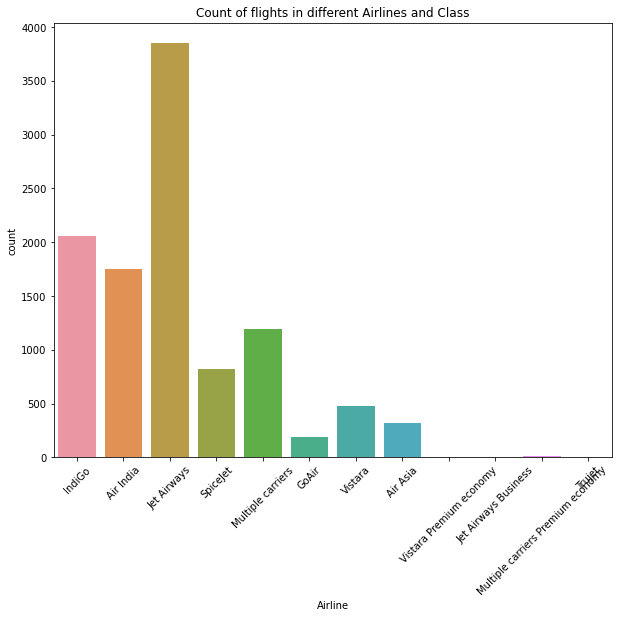

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df["Airline"])
plt.title("Count of flights in different Airlines and Class")
plt.xticks(rotation=45)
plt.show()

- `Jet Airways has the highest count, followed by IndiGo, Air India, Multiple Carriers and SpiceJet`
- `low count in Vistara, Air Asia and GoAir`
- `Very few flights in Vistara Premium economy, Jet Airways Business, Multiple Carriers Premium Economy and Truject`

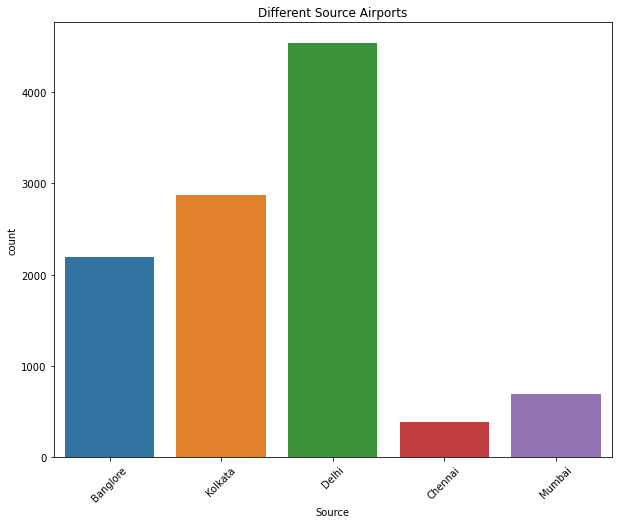

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(df["Source"])
plt.title("Different Source Airports")
plt.xticks(rotation=45)
plt.show()

`Delhi has the highest numbers, followed by Kolkata and Bangalore`

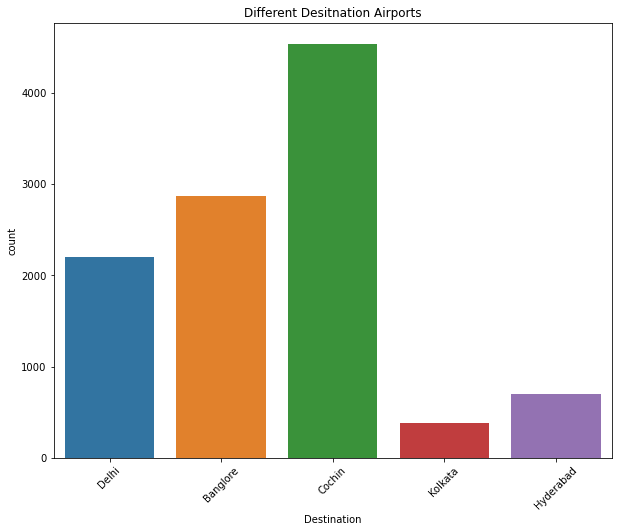

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(df["Destination"])
plt.title("Different Desitnation Airports")
plt.xticks(rotation=45)
plt.show()

`Cochin has the highest numbers, followed by Bangalore and Delhi`

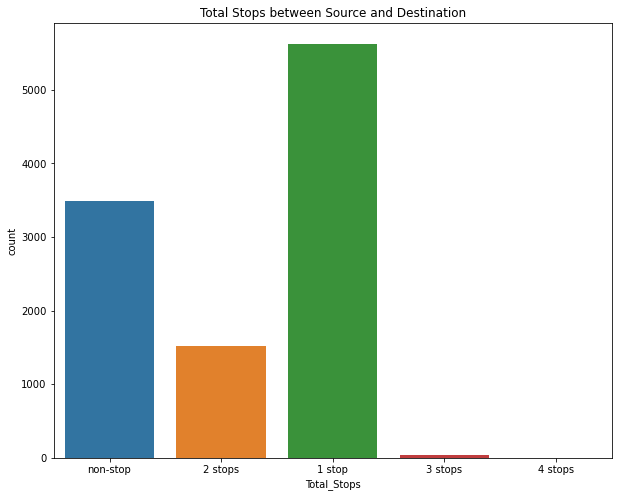

In [42]:
plt.figure(figsize=(10,8))
sns.countplot(df["Total_Stops"])
plt.title("Total Stops between Source and Destination")
plt.show()

`Most flights have 1 stop, followed by non-stop flights and 2 stops`

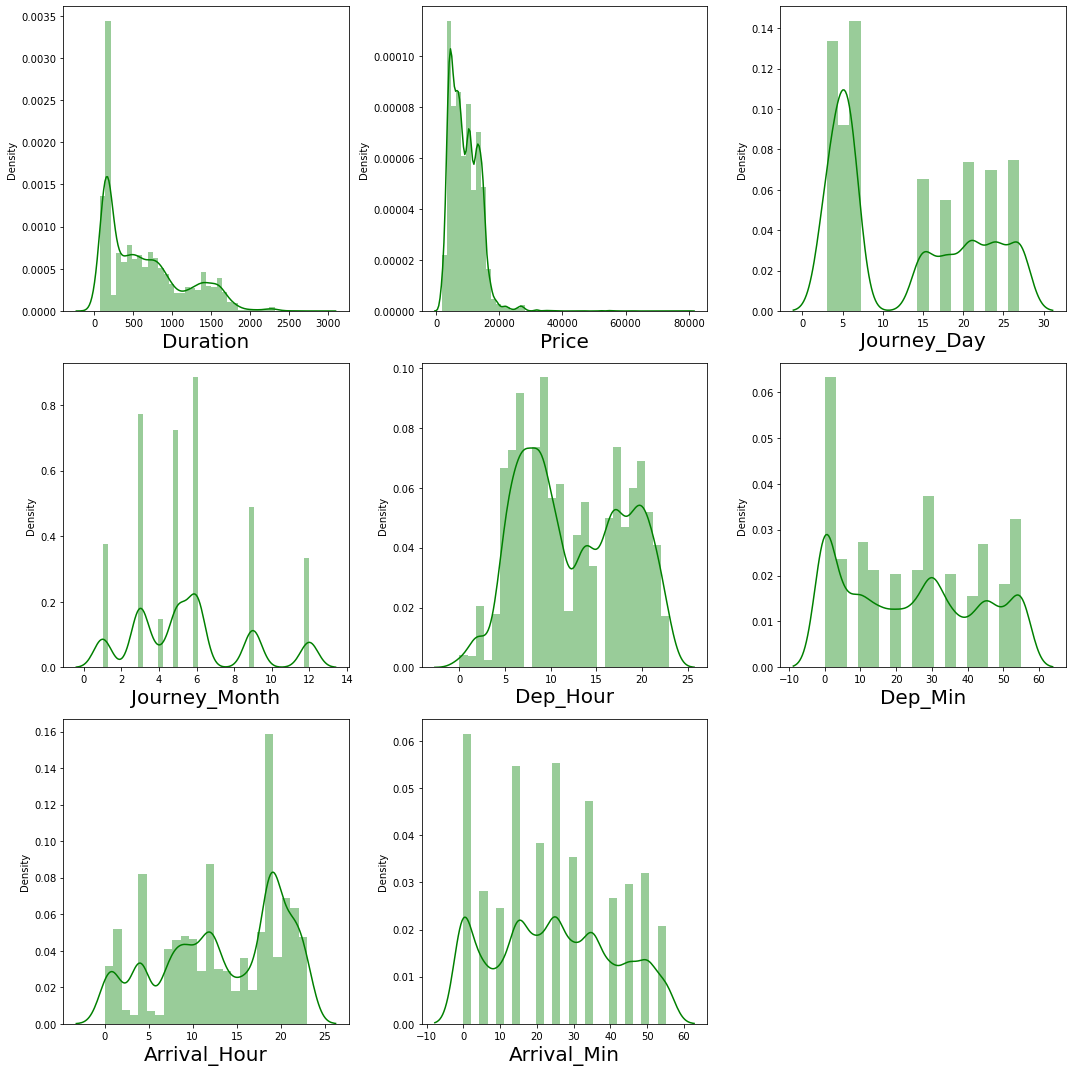

In [43]:
# checking for skewness
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='g')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

`There is skewness in several columns, but none are completely normally distrbuted.`

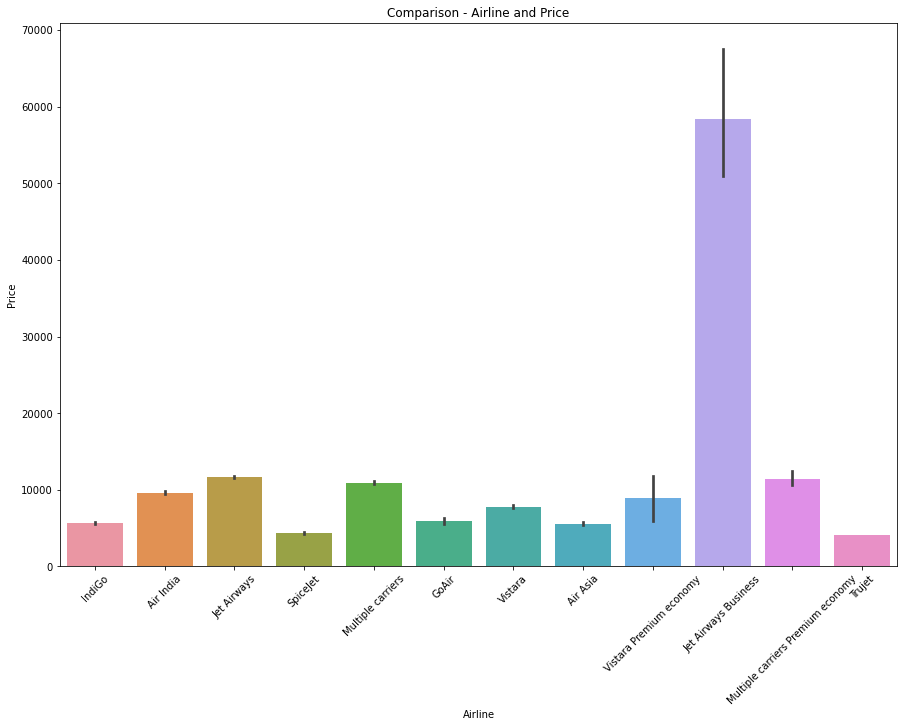

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(df['Airline'],df["Price"],data=df)
plt.title("Comparison - Airline and Price")
plt.xticks(rotation=45)
plt.show()

- `Jet Airways Business has the most expensive tickets and completely stands out`
- `Out of the others, Jet Airways, Multiple Carriers, Multiple Carriers Premium Economy and Air India have expensive tickets`

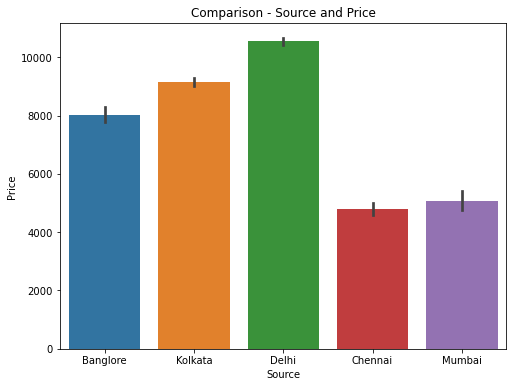

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(df["Source"],df["Price"],data=df)
plt.title("Comparison - Source and Price")
plt.show()

`Flights originating from Delhi are most expensive, followed by those from Kolkata and Bangalore, and then Mumbai and Chennai`

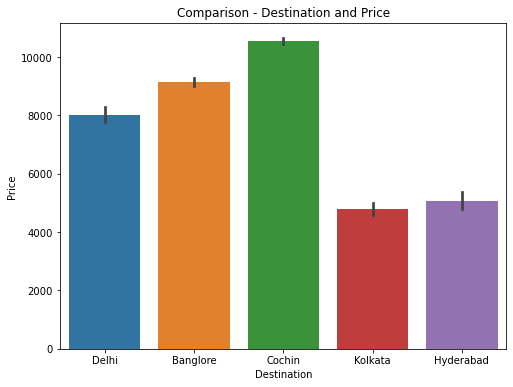

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(df["Destination"],df["Price"],data=df)
plt.title("Comparison - Destination and Price")
plt.show()

`Flights with destination of Cochin are most expensive, followed by Bangalore and Delhi, and then Hyderabad and Kolkata`

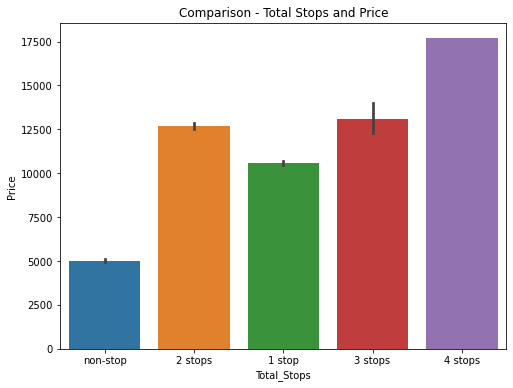

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(df["Total_Stops"],df["Price"],data=df)
plt.title("Comparison - Total Stops and Price")
plt.show()

`we can see that flight prices increase with number of stops - with non-stop flights being the cheapest and flights with 4 stops being the most expensive`

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

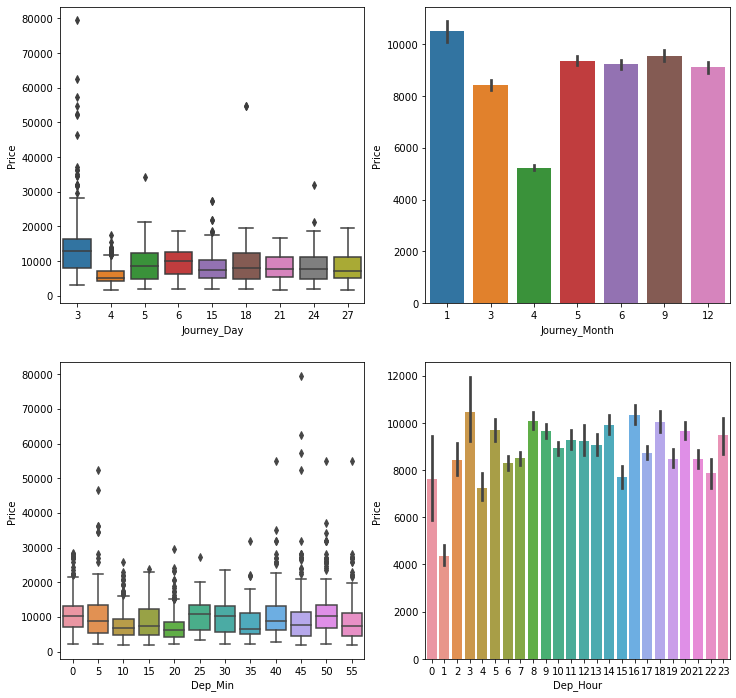

In [48]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

sns.boxplot(x='Journey_Day',y='Price',ax = axes[0,0],data=df)
sns.boxplot(x='Journey_Month',y='Price',ax = axes[0,1],data=df)
sns.boxplot(x='Dep_Min',y='Price',ax=axes[1,0],data=df)
sns.boxplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=df)

- `flights on the 3rd of the month appear to be most expensive`
- `flights are cheapest in April and most expensive in January`
- `Dep_Min does not show any relevant insights`
- `Flights leaving around 1 am are apparently cheaper, followed by those departing at midnight, 5 am and 3 pm`

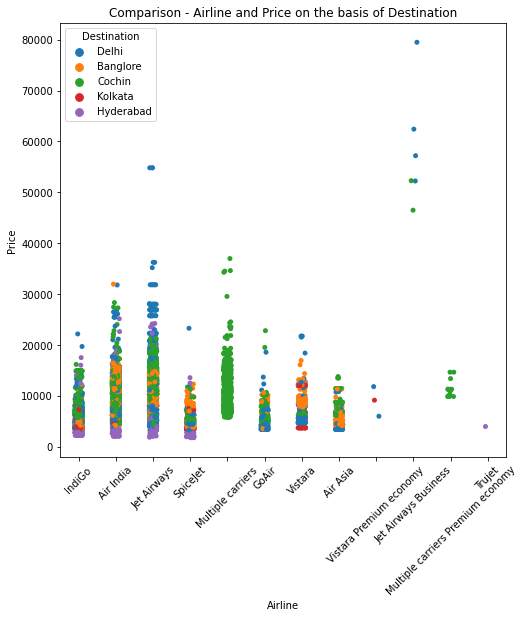

In [49]:
plt.figure(figsize=(8,8))
sns.stripplot(x=df['Airline'],y=df['Price'],hue=df["Destination"])
plt.title("Comparison - Airline and Price on the basis of Destination")
plt.xticks(rotation=45)
plt.show()

`Jet Airways flights to Delhi appear to be very expensive, and most multiple carriers are heading to Cochin`

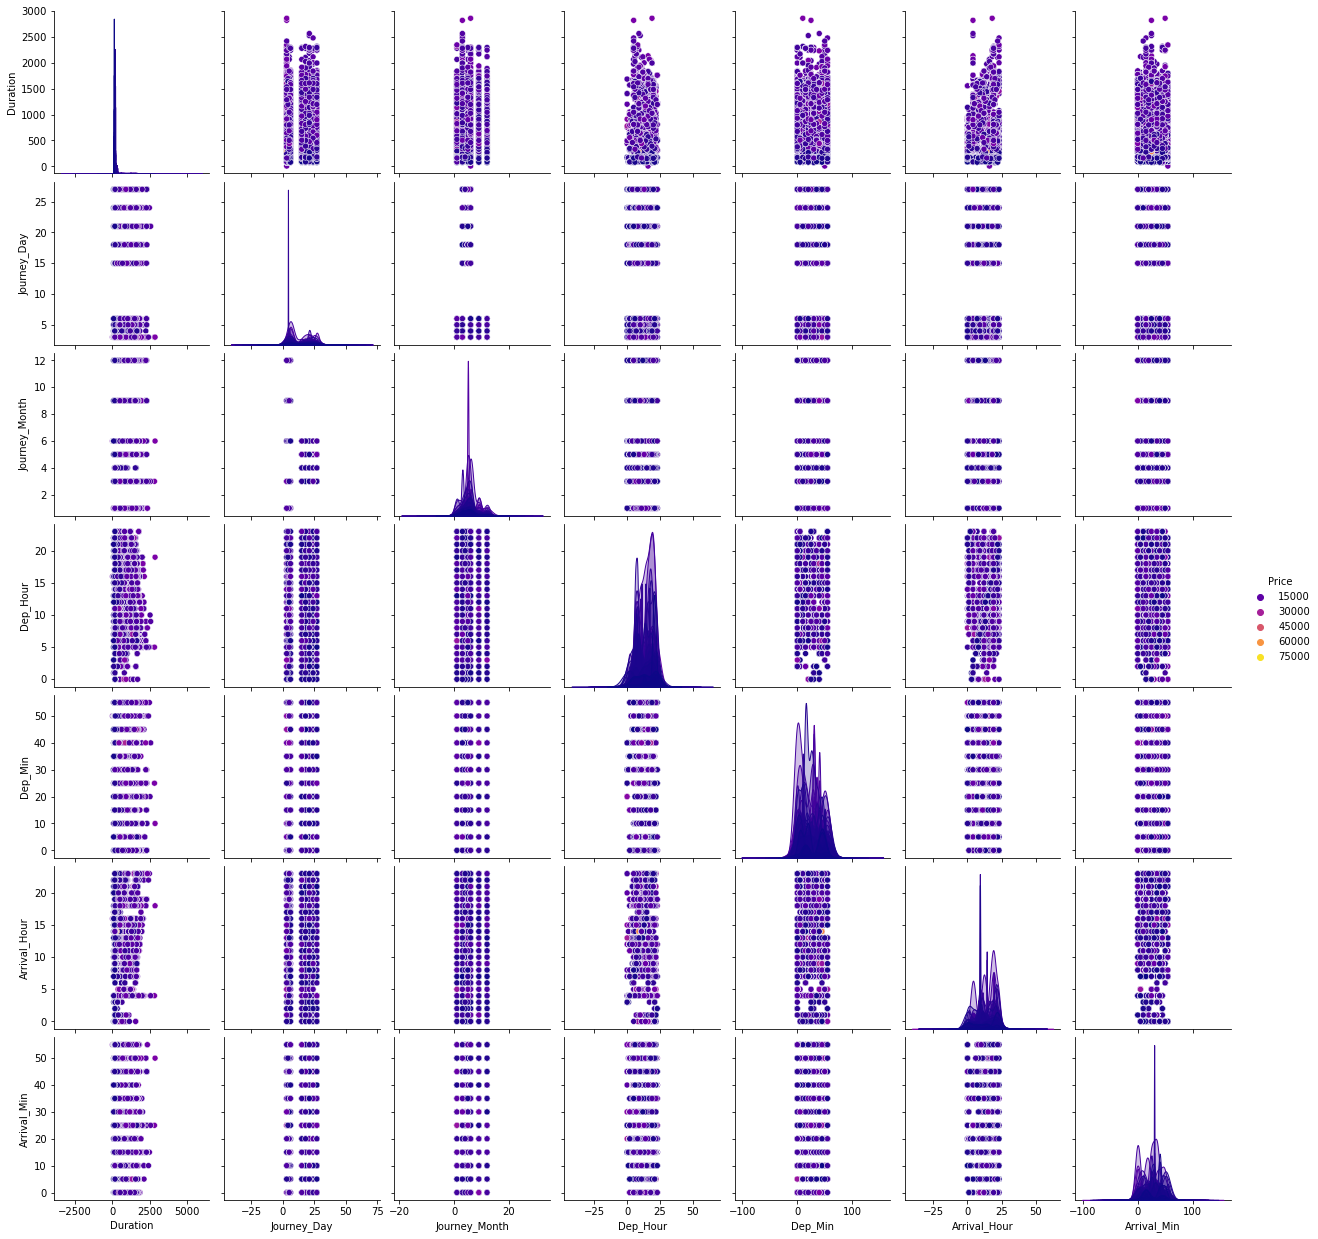

In [75]:
sns.pairplot(df,hue="Price",palette="plasma")
plt.show()

- `shows the relationship of price with all features`
- `skewness is evident on the diagonal`
- `linear relationships between features are also evident`

## Outlier Check

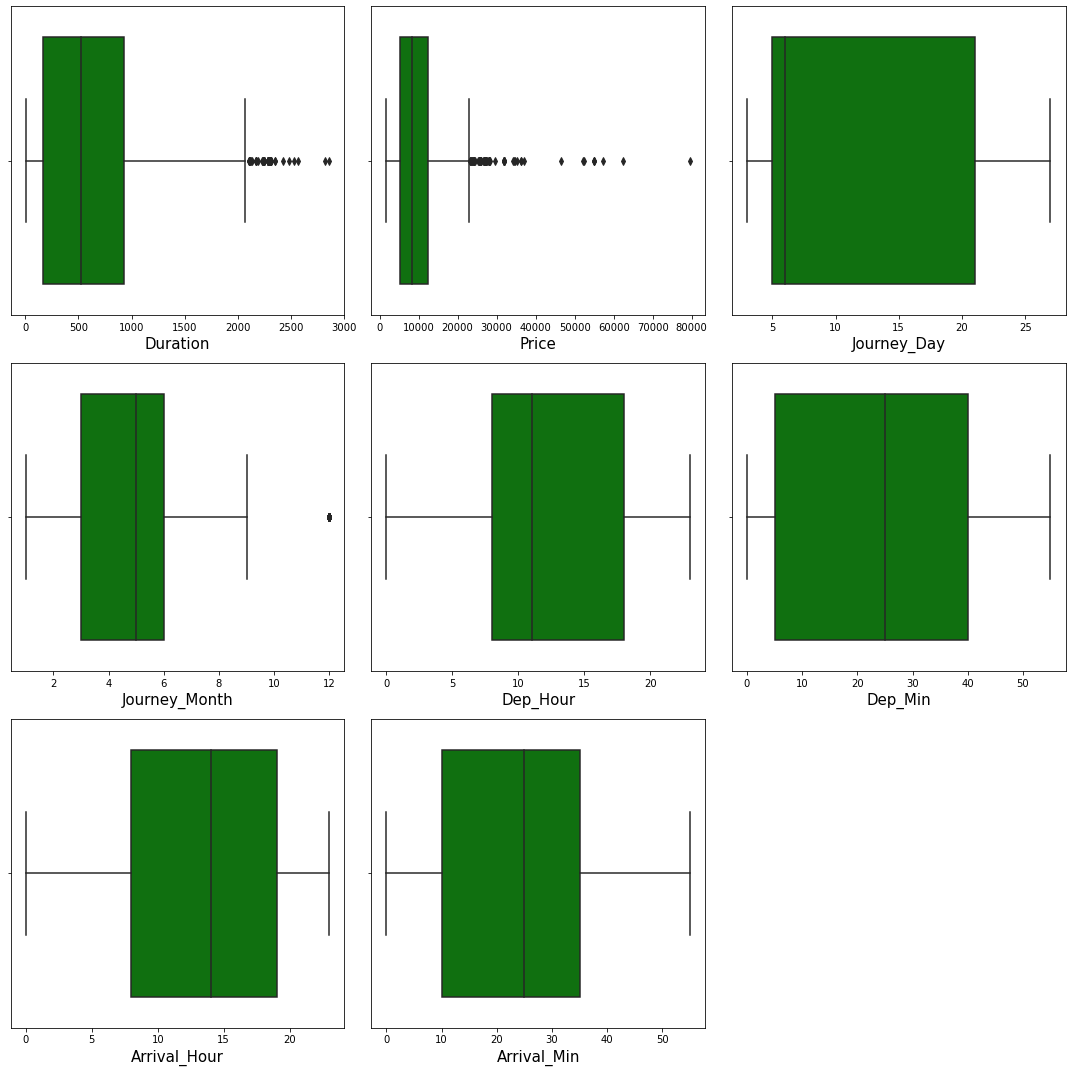

In [51]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color="g")
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

- `Outliers present in Duration, Price and Journey_Month`
- `Need to remove the outliers from Duration and Journey_Month using z score`

In [52]:
features = df[["Duration","Journey_Month"]]
z = np.abs(zscore(features))
z

,Duration,Journey_Month
0,0.931583,0.848503
1,0.390072,1.517993
2,0.978475,1.159966
3,0.626367,2.164201
4,0.705132,1.517993
...,...,...
10678,0.970965,1.159966
10679,0.961120,0.513758
10680,0.911891,0.513758
10681,0.951274,1.517993


In [53]:
new_df = df[(z<3).all(axis=1)]
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No Info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No Info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No Info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No Info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No Info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No Info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No Info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLR → DEL,160,non-stop,No Info,12648,3,1,11,30,14,10


In [54]:
print(df.shape)
print(new_df.shape)

(10683, 14)
(10617, 14)


In [55]:
loss = (10683-10617)/10683*100
loss

0.6178039876439202

`Data loss is very minimal and therefore acceptable`

## Skewness Check

In [56]:
new_df.skew()

Duration         0.774266
Price            1.824502
Journey_Day      0.367029
Journey_Month    0.628224
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

`Again, Duration and Journey_Month have skewness, which needs to be removed`

In [57]:
new_df['Duration'] = np.log1p(new_df['Duration'])

In [58]:
new_df['Journey_Month'] = np.log1p(new_df['Journey_Month'])

In [59]:
new_df.skew()

Duration        -0.178335
Price            1.824502
Journey_Day      0.367029
Journey_Month   -0.533689
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

`Skewness has been removed from Duration and Journey_Month`

## Label Encoding

In [60]:
categorical_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [61]:
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)
new_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,5.141664,4,6,3897,24,1.386294,22,20,1,10
1,1,3,0,84,6.100319,1,6,7662,5,0.693147,5,50,13,15
2,4,2,1,118,7.039660,1,6,13882,6,2.302585,9,25,4,25
3,3,3,0,91,5.786897,0,6,6218,5,2.564949,18,5,23,30
4,3,0,2,29,5.655992,0,6,13302,3,0.693147,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,5.017280,4,6,4107,4,2.302585,19,55,22,25
10679,1,3,0,64,5.049856,4,6,4145,27,1.609438,20,45,23,20
10680,4,0,2,18,5.198497,4,6,7229,27,1.609438,8,20,11,20
10681,10,0,2,18,5.081404,4,6,12648,3,0.693147,11,30,14,10


`All categorical information has been encoded into numerical information`

## Establishing correlations

In [62]:
corr = new_df.corr()
corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013644,0.070721,0.028401,-0.122143,0.035669,0.092783,-0.036874,0.030219,-0.001278,-0.041977,-0.061477,-0.002555,-0.073921
Source,-0.013644,1.000000,-0.434677,0.404009,0.122739,-0.225922,0.008129,0.016718,0.007158,0.062011,0.059469,-0.055929,0.026144,0.021640
Destination,0.070721,-0.434677,1.000000,-0.230755,-0.509154,0.510659,0.093871,-0.263334,0.007309,-0.061873,-0.088810,0.097052,-0.058190,0.006954
Route,0.028401,0.404009,-0.230755,1.000000,0.368475,-0.439372,0.029469,0.163635,0.096042,0.076196,-0.070005,-0.066420,0.011514,-0.174071
Duration,-0.122143,0.122739,-0.509154,0.368475,1.000000,-0.809980,-0.254019,0.605786,-0.042848,0.061807,-0.001689,-0.033797,0.056730,-0.125315
Total_Stops,0.035669,-0.225922,0.510659,-0.439372,-0.809980,1.000000,0.242302,-0.572413,0.043711,-0.048791,0.038512,0.049105,-0.095213,0.176915
Additional_Info,0.092783,0.008129,0.093871,0.029469,-0.254019,0.242302,1.000000,-0.193478,0.018760,0.020064,-0.042549,0.001786,-0.020098,0.030347
Price,-0.036874,0.016718,-0.263334,0.163635,0.605786,-0.572413,-0.193478,1.000000,-0.163765,-0.013511,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.030219,0.007158,0.007309,0.096042,-0.042848,0.043711,0.018760,-0.163765,1.000000,-0.097582,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,-0.001278,0.062011,-0.061873,0.076196,0.061807,-0.048791,0.020064,-0.013511,-0.097582,1.000000,0.020587,-0.005264,-0.005743,-0.031453


<AxesSubplot:>

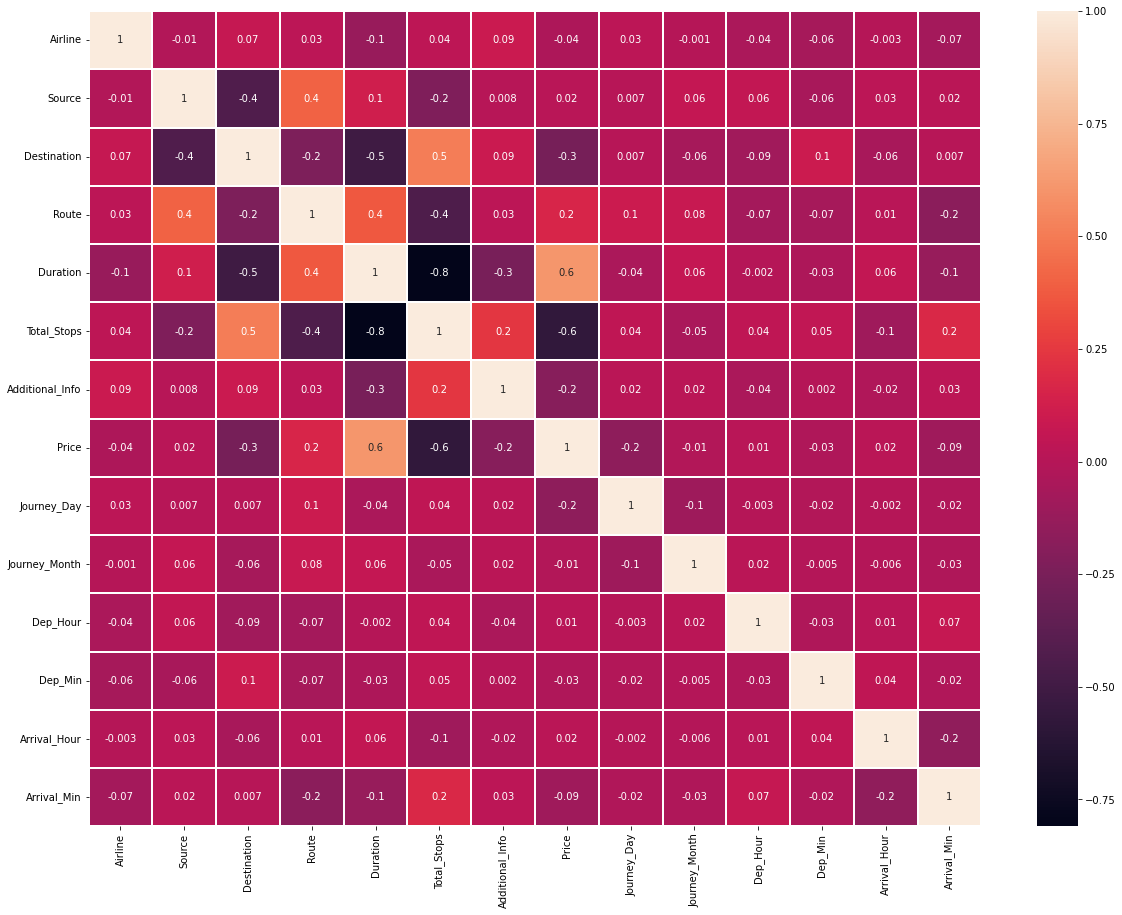

In [63]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,fmt=".1g",annot=True)

- `Duration is highly positively correlated with the target variable`
- `Total Stops is highly negatively correlated with the target variable`

In [64]:
corr["Price"].sort_values(ascending=False)

Price              1.000000
Duration           0.605786
Route              0.163635
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Airline           -0.036874
Arrival_Min       -0.088909
Journey_Day       -0.163765
Additional_Info   -0.193478
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

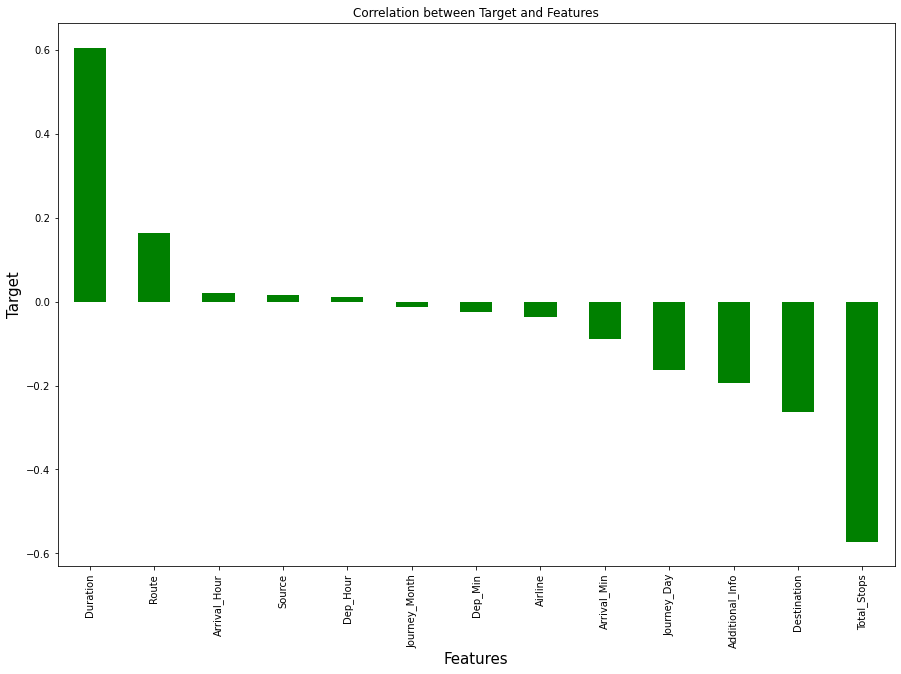

In [65]:
plt.figure(figsize=(15,10))
new_df.corr()["Price"].sort_values(ascending=False).drop(["Price"]).plot(kind="bar",color="g")
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between Target and Features')
plt.show()

- `Duration and Total Stops are highly correlated to Price`
- `Departure Hour and Month of Journey have very low correlation with price`

## Feature Scaling

In [66]:
x = new_df.drop("Price",axis=1)
y = new_df["Price"]

In [67]:
x.shape

(10617, 13)

In [68]:
y.shape

(10617,)

In [69]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.416258,-1.655042,0.812707,-1.544003,-1.058285,1.402360,0.331561,1.286176,-0.754967,1.649475,-0.235894,-1.794784,-0.889208
1,-1.266881,0.888124,-1.157048,0.254498,0.007344,-0.253797,0.331561,-0.873920,-2.141814,-1.312186,1.362715,-0.046050,-0.586465
2,0.009053,0.040402,-0.172170,1.180998,1.051504,-0.253797,0.331561,-0.760231,1.078344,-0.615325,0.030541,-1.357601,0.019019
3,-0.416258,0.888124,-1.157048,0.445248,-0.341051,-0.805850,0.331561,-0.873920,1.603281,0.952614,-1.035199,1.411228,0.321762
4,-0.416258,-1.655042,0.812707,-1.244253,-0.486564,-0.805850,0.331561,-1.101299,-2.141814,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-1.692192,0.888124,-1.157048,-0.290502,-1.196549,1.402360,0.331561,-0.987609,1.078344,1.126829,1.629150,1.265500,0.019019
10613,-1.266881,0.888124,-1.157048,-0.290502,-1.160337,1.402360,0.331561,1.627244,-0.308502,1.301044,1.096280,1.411228,-0.283723
10614,0.009053,-1.655042,0.812707,-1.544003,-0.995110,1.402360,0.331561,1.627244,-0.308502,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.560922,-1.655042,0.812707,-1.544003,-1.125269,1.402360,0.331561,-1.101299,-2.141814,-0.266894,0.296976,0.099677,-0.889208


`Bias has been removed using Standard Scaler`

## VIF

In [70]:
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,1.047185,Airline
1,1.526467,Source
2,1.775435,Destination
3,1.568247,Route
4,3.303510,Duration
5,3.400398,Total_Stops
6,1.113860,Additional_Info
7,1.033612,Journey_Day
8,1.022385,Journey_Month
9,1.031386,Dep_Hour


`All features have VIF less than 10, so no problem of multicollinearity`

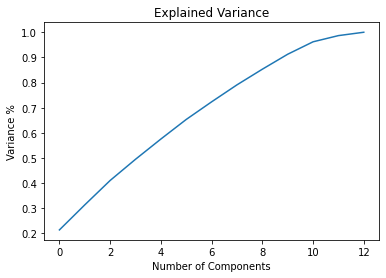

In [71]:
pca = PCA()
pr_comp = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

## Model Building

`Finding best random state`

In [81]:
maxAccu = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Maximum r2_score is ",maxAccu,"at random_state",maxRS)

Maximum r2_score is  0.9072849958285065 at random_state 0


In [82]:
x_train,x_test,y_train,y_test = TTS(x,y,test_size=0.30,random_state=maxRS)

In [123]:
lr = LinearRegression()
rf = RandomForestRegressor()
svr = SVR()
dt = DecisionTreeRegressor()

NameError: name 'LinearRegression' is not defined

In [ ]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
svr.fit(x_train,y_train)
dt.fit(x_train,y_train)

In [ ]:
print("-"*50)
print("Linear Regression Model")
print("-"*50)
lr_pred = lr.predict(x_test)
print("R2 Score: ", r2_score(y_test,lr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,lr_pred), "\n"*2)

print("-"*50)
print("Random Forest Model")
print("-"*50)
rf_pred = rf.predict(x_test)
print("R2 Score: ", r2_score(y_test,rf_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,rf_pred), "\n"*2)

print("-"*50)
print("Support Vector Regression Model")
print("-"*50)
svr_pred = svr.predict(x_test)
print("R2 Score: ", r2_score(y_test,svr_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,svr_pred), "\n"*2)

print("-"*50)
print("Decision Tree Model")
print("-"*50)
dt_pred = dt.predict(x_test)
print("R2 Score: ", r2_score(y_test,dt_pred), "\n")
print("Mean Squared Error: ", mean_squared_error(y_test,dt_pred), "\n"*2)

In [ ]:
sns.violinplot(y_test,lr_pred,color='g')
plt.show()

In [ ]:
sns.violinplot(y_test,rf_pred,color='g')
plt.show()

In [84]:
sns.violinplot(y_test,svr_pred,color='g')
plt.show()

NameError: name 'svr_pred' is not defined

In [ ]:
sns.violinplot(y_test,dt_pred,color='g')
plt.show()

In [ ]:
print("Cross Validation Score for Linear Regression Model: ", cross_val_score(lr,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Random Forest Model: ", cross_val_score(rf,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Support Vector Regression Model: ", cross_val_score(svr,x,y,cv=5).mean(), "\n"*2)
print("Cross Validation Score for Decision Tree Model: ", cross_val_score(dt,x,y,cv=5).mean(), "\n"*2)

#### It appears `Random Forest` is the best model for our prediction.

## Hyperparameter Tuning

In [85]:
parameters = {'n_estimators':[10,50,100],
              'max_depth':[10,20,30],
              'max_features':['auto','sqrt'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 5, 8]
             }

In [86]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [10, 50, 100]})

In [88]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [89]:
Final_model = RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))

R2_Score: 90.11011130948759
RMSE value: 1431.8156351276255
MAE: 778.6031270897139
MSE: 2050096.0129959253


#### Post hyperparameter tuning, the R2 score has gone from 88.80% to 90.21%.

## Saving and relaoding the model for prediction

In [90]:
joblib.dump(Final_model,'Flight_Price_Prediction.pkl')

['Flight_Price_Prediction.pkl']

In [91]:
Model = joblib.load("Flight_Price_Prediction.pkl")

origg = np.array(y_test)
predicted = np.array(Model.predict(x_test))
df_com = pd.DataFrame({"Original":origg,"Predicted":predicted},index= range(len(origg)))
df_com

,Original,Predicted
0,17024,16130.180000
1,7817,8923.510000
2,13376,13413.280000
3,14486,9667.878333
4,11560,11792.330000
...,...,...
3181,14388,13990.640000
3182,10368,10565.190000
3183,9899,10485.270000
3184,12395,12485.650000


# Predicting using Test Data

## Preparing the test data for prediction

In [92]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [93]:
test_df.shape

(2671, 10)

In [94]:
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'])

In [95]:
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'])

In [96]:
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [97]:
test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [98]:
test_df.drop("Date_of_Journey",axis=1,inplace=True)

In [99]:
test_df['Duration']=test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration']=pd.to_numeric(test_df['Duration'])

In [100]:
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

In [101]:
test_df.drop("Dep_Time",axis=1,inplace=True)

In [102]:
test_df['Arrival_Hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_Min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [103]:
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")
test_df['Additional_Info'] = test_df['Additional_Info'].replace("No info", "No Info")

In [104]:
df_null_test = test_df[test_df.isna().any(axis=1)]
df_null_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min


In [105]:
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [106]:
test_df.describe()

,Duration,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,639.74167,12.026956,5.607263,12.603519,24.891426,13.585174,24.558218
std,502.18693,8.564408,3.042952,5.686673,19.086522,7.040396,16.775436
min,5.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,175.00000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.00000,6.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,915.00000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,2440.00000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


In [107]:
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [108]:
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


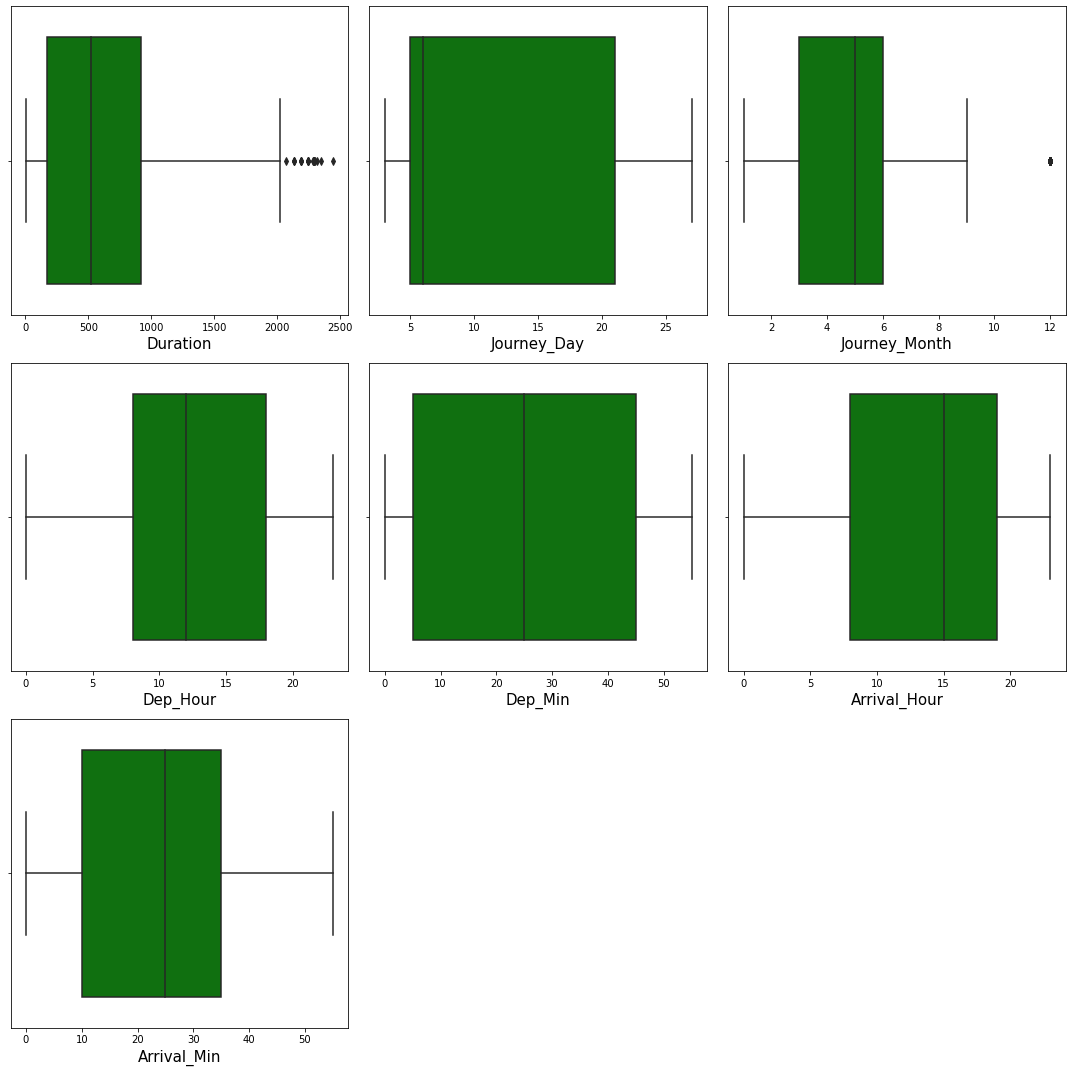

In [109]:
# outlier check
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[col],color='g')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [110]:
features = test_df[["Duration","Journey_Month"]]
z = np.abs(zscore(features))
z

,Duration,Journey_Month
0,0.030389,0.129089
1,0.796151,2.101227
2,1.563970,0.199601
3,0.279347,0.199601
4,0.935567,0.129089
...,...,...
2666,1.583887,0.129089
2667,0.965442,0.856981
2668,0.487443,0.129089
2669,0.548222,0.129089


In [111]:
new_test_df = test_df[(z<3).all(axis=1)]
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No Info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No Info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No Info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No Info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No Info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No Info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No Info,3,6,4,0,19,15


In [112]:
test_df.shape

(2671, 13)

In [113]:
new_test_df.shape

(2653, 13)

In [114]:
loss = (2671-2653)/2671*100
loss

0.6739049045301385

In [115]:
# skewness check
new_test_df.skew()

Duration         0.809826
Journey_Day      0.475210
Journey_Month    0.591565
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

In [116]:
new_test_df["Duration"]=np.log1p(new_test_df["Duration"])
new_test_df["Journey_Month"]=np.log1p(new_test_df["Journey_Month"])

In [117]:
new_test_df.skew()

Duration        -0.229080
Journey_Day      0.475210
Journey_Month   -0.541053
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

In [118]:
# label encoding
LE=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(LE.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,6.486161,0,4,6,1.945910,17,30,4,25
1,3,3,0,65,5.484797,0,4,5,2.564949,6,20,10,20
2,4,2,1,76,7.262629,0,3,21,1.791759,19,15,19,0
3,6,2,1,76,6.660575,0,4,21,1.791759,8,0,21,0
4,0,0,2,16,5.141664,4,4,24,1.945910,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,7.269617,0,4,6,1.945910,20,30,20,25
2667,3,3,0,43,5.049856,4,4,27,1.386294,14,20,16,55
2668,4,2,1,76,5.981414,0,4,3,1.945910,21,50,4,25
2669,1,2,1,76,6.820016,0,4,3,1.945910,4,0,19,15


In [119]:
# feature scaling
scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df),columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.004605,0.031440,-0.167242,0.804966,0.438880,-0.791072,0.327568,-0.706193,0.344970,0.766320,0.272445,-1.354818,0.025591
1,-0.431683,0.873978,-1.175634,0.398570,-0.681421,-0.791072,0.327568,-0.823069,1.565339,-1.172433,-0.252462,-0.503215,-0.272182
2,0.004605,0.031440,-0.167242,0.804966,1.307572,-0.791072,-1.989868,1.046954,0.041078,1.118821,-0.514916,0.774190,-1.463273
3,0.877180,0.031440,-0.167242,0.804966,0.634010,-0.791072,0.327568,1.046954,0.041078,-0.819933,-1.302277,1.058057,-1.463273
4,-1.740546,-1.653635,0.841150,-1.411740,-1.065309,1.429790,0.327568,1.397583,0.344970,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.304259,0.873978,-1.175634,-0.118662,1.315390,-0.791072,0.327568,-0.706193,0.344970,1.295071,0.272445,0.916123,0.025591
2649,-0.431683,0.873978,-1.175634,-0.414222,-1.168021,1.429790,0.327568,1.748212,-0.758252,0.237569,-0.252462,0.348388,1.812227
2650,0.004605,0.031440,-0.167242,0.804966,-0.125818,-0.791072,0.327568,-1.056822,0.344970,1.471321,1.322260,-1.354818,0.025591
2651,-1.304259,0.031440,-0.167242,0.804966,0.812389,-0.791072,0.327568,-1.056822,0.344970,-1.524934,-1.302277,0.774190,-0.569955


## Predicting the flight price

In [120]:
Predicted_Price = Model.predict(new_test_df)
Predicted_Price

array([14045.91,  4256.69, 12645.95, ..., 15950.95, 12999.72,  7673.57])

In [121]:
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price
Prediction

,Price
0,14045.910
1,4256.690
2,12645.950
3,10904.625
4,3903.080
...,...
2648,10293.480
2649,5390.190
2650,15950.950
2651,12999.720


In [122]:
Prediction.to_csv("Flight_Price_Prediction_TestData.csv",index=False)

Concluded